#Importações

In [1]:
# Rodar uma vez ao iniciar o projeto.
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import fastf1.plotting
import fastf1 as f1
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import Dense, Embedding, Flatten, Concatenate
from sklearn import preprocessing
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.11/dist-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(


#Mineração dos Dados

In [63]:
def load_laps(load):
    dataset = load.laps.pick_quicklaps().reset_index()
    return dataset

def load_weather(load):
    dataset = load.laps.get_weather_data()
    return dataset

def etl (season, session):
    ds = f1.get_session(season, "Monza", session)
    return ds

In [64]:
race_dataset = []
season = 2022
for s in range(3):
  season
  for e in ['FP1','FP2','FP3','Q']:
    session = e
    get = etl(season,session)
    get.load()
    race_dataset.append(load_laps(get))
  season = season + 1
race_dataset = pd.concat(race_dataset)

race_dataset = race_dataset.sort_values(by='Time')

core           INFO 	Loading data for Italian Grand Prix - Practice 1 [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Practice 1 [v3.4.4]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
core        

In [ ]:
race_dataset.columns

Index(['index', 'Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber',
       'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
       'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST',
       'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team',
       'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position', 'Deleted',
       'DeletedReason', 'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [65]:
race_dataset = race_dataset.dropna(subset=['LapTime'])
soft_compound_only = race_dataset[race_dataset['Compound'] == 'SOFT']
Model_Data = soft_compound_only[['Team', 'Driver', 'Compound', 'TyreLife','SpeedI1','SpeedI2','Sector1Time','Sector2Time','Sector3Time' ,'SpeedFL','SpeedST','LapTime']]
Model_Data

,Team,Driver,Compound,TyreLife,SpeedI1,SpeedI2,Sector1Time,Sector2Time,Sector3Time,SpeedFL,SpeedST,LapTime
84,Kick Sauber,ZHO,SOFT,2.0,324.0,337.0,0 days 00:00:26.931000,0 days 00:00:27.756000,0 days 00:00:27.281000,308.0,346.0,0 days 00:01:21.968000
72,Alpine,OCO,SOFT,2.0,326.0,338.0,0 days 00:00:26.660000,0 days 00:00:27.595000,0 days 00:00:27.091000,312.0,346.0,0 days 00:01:21.346000
68,Alpine,GAS,SOFT,2.0,327.0,339.0,0 days 00:00:26.990000,0 days 00:00:27.843000,0 days 00:00:27.075000,315.0,348.0,0 days 00:01:21.908000
65,Haas F1 Team,MAG,SOFT,2.0,326.0,341.0,0 days 00:00:26.784000,0 days 00:00:27.203000,0 days 00:00:26.869000,315.0,350.0,0 days 00:01:20.856000
52,Haas F1 Team,HUL,SOFT,2.0,328.0,341.0,0 days 00:00:26.513000,0 days 00:00:27.363000,0 days 00:00:26.905000,311.0,351.0,0 days 00:01:20.781000
...,...,...,...,...,...,...,...,...,...,...,...,...
26,Mercedes,RUS,SOFT,2.0,319.0,333.0,0 days 00:00:26.889000,0 days 00:00:27.159000,0 days 00:00:26.623000,310.0,338.0,0 days 00:01:20.671000
42,Ferrari,LEC,SOFT,6.0,321.0,335.0,0 days 00:00:27.103000,0 days 00:00:27.488000,0 days 00:00:27.481000,311.0,341.0,0 days 00:01:22.072000
56,Mercedes,HAM,SOFT,2.0,319.0,332.0,0 days 00:00:26.807000,0 days 00:00:27.201000,0 days 00:00:26.812000,310.0,338.0,0 days 00:01:20.820000
42,Haas F1 Team,MAG,SOFT,5.0,314.0,327.0,0 days 00:00:27.420000,0 days 00:00:28.200000,0 days 00:00:27.583000,302.0,338.0,0 days 00:01:23.203000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

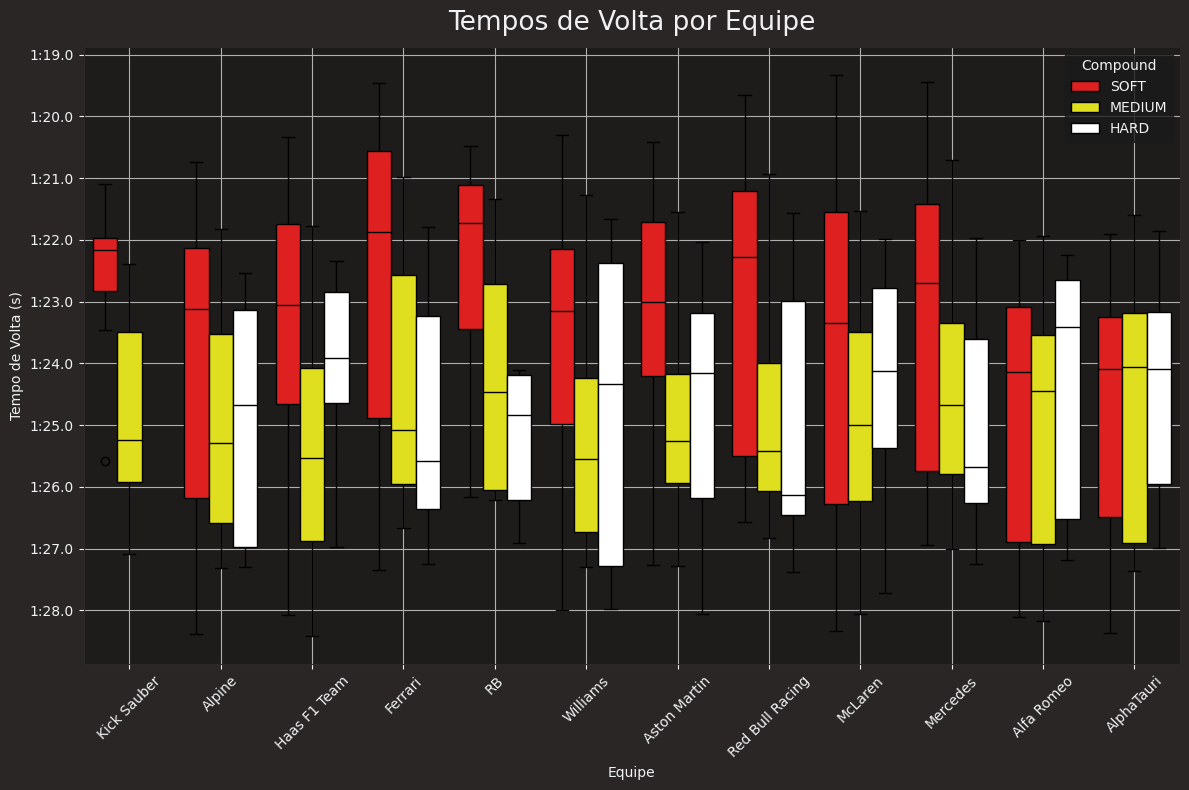

In [ ]:
f1_dataset = race_dataset[[ 'Team', 'Driver', 'Compound', 'TyreLife','SpeedI1','SpeedI2','SpeedFL','SpeedST','LapTime']]

f1_timesLaps_compound = f1_dataset[['Team', 'LapTime', 'Compound']]
compound_colors = {'SOFT': 'red', 'MEDIUM': 'yellow', 'HARD': 'white', 'UNKNOWN' : "black"}
plt.figure(figsize=(12, 8))
sns.boxplot(data=f1_dataset, x='Team', y='LapTime', hue='Compound', palette=compound_colors)
plt.title('Tempos de Volta por Equipe')
plt.xlabel('Equipe')
plt.ylabel('Tempo de Volta (s)')
plt.xticks(rotation=45)
plt.legend(title='Compound')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


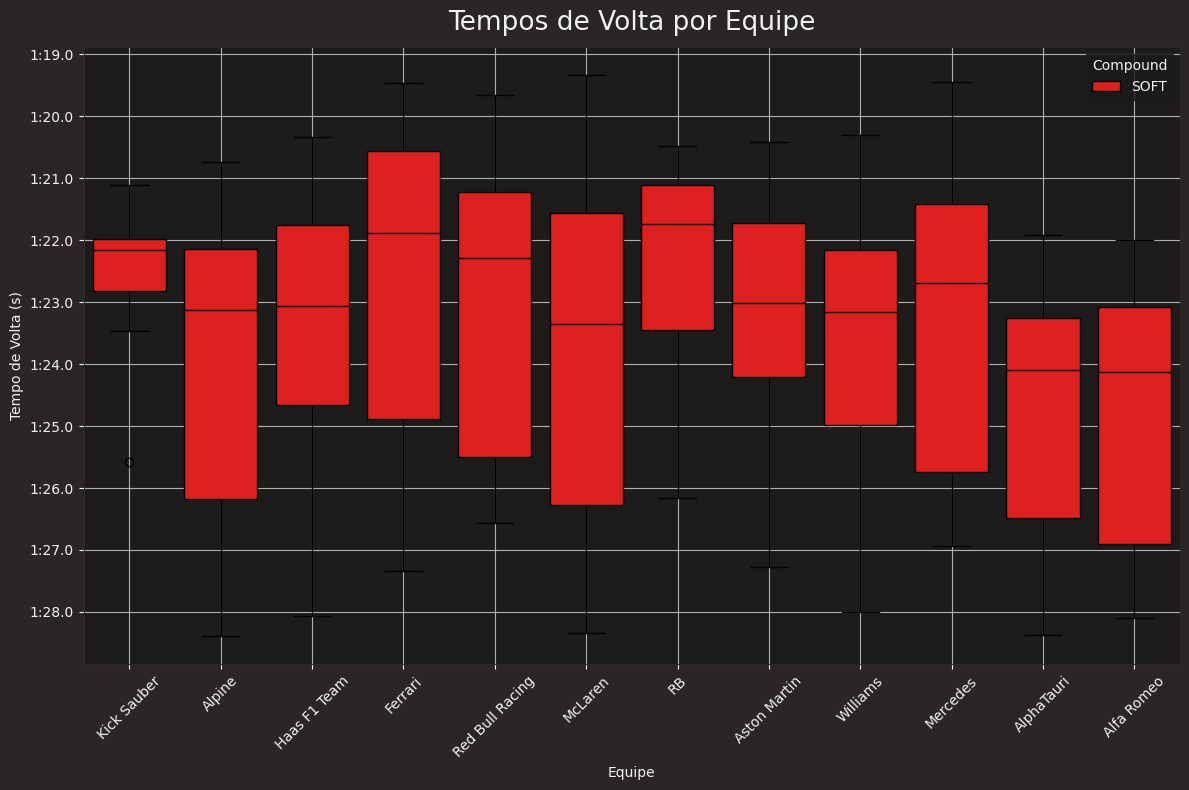

In [ ]:
soft_compound_only = soft_compound_only[['Driver','LapTime','Compound', 'TyreLife', 'FreshTyre', 'Team']]

f1_timesLaps_compound = soft_compound_only[['Team', 'LapTime', 'Compound']]
compound_colors = {'SOFT': 'red', 'MEDIUM': 'yellow', 'HARD': 'white', 'UNKNOWN' : "black"}
plt.figure(figsize=(12, 8))
sns.boxplot(data=soft_compound_only, x='Team', y='LapTime', hue='Compound', palette=compound_colors)
plt.title('Tempos de Volta por Equipe')
plt.xlabel('Equipe')
plt.ylabel('Tempo de Volta (s)')
plt.xticks(rotation=45)
plt.legend(title='Compound')
plt.grid(True)
plt.tight_layout()
plt.show()

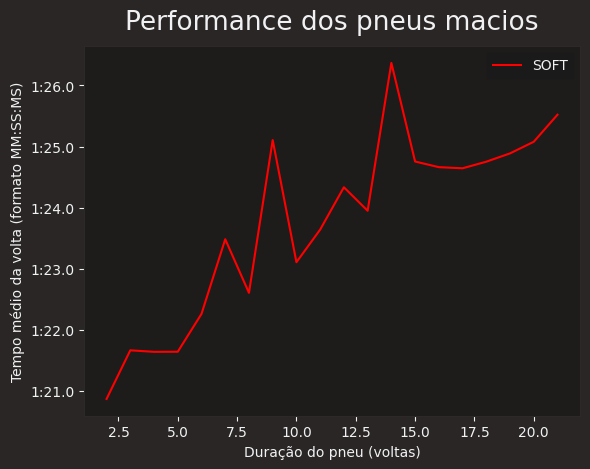

In [ ]:
Apenas_pneus_macios = race_dataset[race_dataset['Compound'] == 'SOFT']
lap_times = Apenas_pneus_macios[Apenas_pneus_macios['Team'] == "Ferrari"]

lap_times = lap_times.groupby(['Compound', 'TyreLife', 'Team'])['LapTime'].mean()

combined_dataset = lap_times.to_frame().reset_index()

for compound in combined_dataset['Compound'].unique():
    data = combined_dataset.loc[combined_dataset['Compound'] == compound]
    plt.plot(data['TyreLife'], data['LapTime'], label=compound, color=compound_colors.get(compound, 'black'))


# Definir labels dos eixos
plt.xlabel('Duração do pneu (voltas)')
plt.ylabel('Tempo médio da volta (formato MM:SS:MS)')

# Adicionar legenda
plt.legend()
plt.title('Performance dos pneus macios')
# Mostrar o gráfico
plt.show()





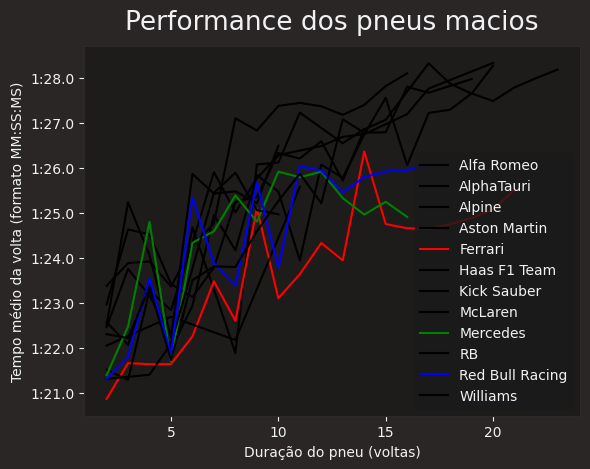

In [ ]:
Team_colors = {'Ferrari': 'red', 'Red Bull Racing': 'Blue', 'Mercedes': 'Green'}
Apenas_pneus_macios = race_dataset[race_dataset['Compound'] == 'SOFT']
lap_times = Apenas_pneus_macios[Apenas_pneus_macios['Compound'] == "SOFT"]

lap_times = lap_times.groupby(['Compound', 'TyreLife', 'Team'])['LapTime'].mean()

combined_dataset = lap_times.to_frame().reset_index()

for team in combined_dataset['Team'].unique():
    data = combined_dataset.loc[combined_dataset['Team'] == team]
    plt.plot(data['TyreLife'], data['LapTime'], label=team, color=Team_colors.get(team, 'black'))

# Definir labels dos eixos
plt.xlabel('Duração do pneu (voltas)')
plt.ylabel('Tempo médio da volta (formato MM:SS:MS)')

# Adicionar legenda
plt.legend()
plt.title('Performance dos pneus macios')
# Mostrar o gráfico
plt.show()

In [66]:
# Pré-processamento dos dados
Model_Data = Model_Data.dropna()
Model_Data['LapTime'] = pd.to_timedelta(Model_Data['LapTime']).dt.total_seconds()
Model_Data['Sector1Time'] = pd.to_timedelta(Model_Data['Sector1Time']).dt.total_seconds()
Model_Data['Sector2Time'] = pd.to_timedelta(Model_Data['Sector2Time']).dt.total_seconds()
Model_Data['Sector3Time'] = pd.to_timedelta(Model_Data['Sector3Time']).dt.total_seconds()


# Certificar que os índices são únicos para evitar problemas de reindexação
Model_Data = Model_Data.reset_index(drop=True)
# Separação entre features (X) e target (y)
X = Model_Data[['Team', 'Driver', 'Compound', 'TyreLife', 'SpeedI1', 'SpeedI2',
                'Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedFL', 'SpeedST']]
y = Model_Data['LapTime']

# Codificação das variáveis categóricas e preservação dos nomes dos pilotos
label_encoders = {}
for col in ['Team', 'Driver', 'Compound']:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Preserve os nomes originais dos pilotos antes da codificação
X['Driver_Name'] = Model_Data['Driver']  # Coluna para preservar o nome do piloto

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['Driver_Name']), y, test_size=0.2, random_state=42)

<ipython-input-66-9f94aa646b27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model_Data['LapTime'] = pd.to_timedelta(Model_Data['LapTime']).dt.total_seconds()
<ipython-input-66-9f94aa646b27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model_Data['Sector1Time'] = pd.to_timedelta(Model_Data['Sector1Time']).dt.total_seconds()
<ipython-input-66-9f94aa646b27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [67]:
# Definir a arquitetura da rede neural
model = Sequential([
    Dense(11, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 305.7166 - mae: 12.5861 - val_loss: 17.9755 - val_mae: 3.7028
Epoch 2/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.6847 - mae: 3.1277 - val_loss: 16.3896 - val_mae: 3.4122
Epoch 3/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.3892 - mae: 3.1342 - val_loss: 14.4618 - val_mae: 3.3063
Epoch 4/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.9486 - mae: 2.9513 - val_loss: 12.5808 - val_mae: 3.0617
Epoch 5/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.8935 - mae: 2.8324 - val_loss: 11.4064 - val_mae: 2.8146
Epoch 6/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3575 - mae: 2.4848 - val_loss: 9.8321 - val_mae: 2.7111
Epoch 7/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3688 - mae: 2.3440 - val_loss: 9.5825 - val_mae: 2.5384
Epoch 8/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9405 - mae: 2.2989 - val_loss: 8.4823 - val_mae: 2.3645
Epoch 9/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [68]:
# Fazer a previsão com os dados de teste
y_pred = model.predict(X_test)
# Criar um DataFrame com os dados de teste e as previsões
predictions_df = X_test.copy()  # Copiar os dados de teste
predictions_df['Predicted_LapTime'] = y_pred  # Adicionar a coluna das previsões

# Adicionar os nomes reais dos pilotos de volta aos dados de teste
predictions_df['Driver_Name'] = Model_Data.loc[X_test.index, 'Driver']  # Recupera os nomes dos pilotos

# Agrupar as previsões por nome do piloto e obter o menor tempo de volta previsto para cada piloto
min_laptime_per_driver = predictions_df.groupby('Driver_Name')['Predicted_LapTime'].min().reset_index()

# Exibir os resultados
print(min_laptime_per_driver.sort_values(by='Predicted_LapTime'))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
   Driver_Name  Predicted_LapTime
2          BOT          77.156822
0          ALB          80.221237
18         SAI          80.442337
15         PIA          80.446594
17         RUS          80.464096
11         MAG          80.637329
22         VER          80.639053
6          HAM          80.730354
10         LEC          80.877022
14         PER          81.017227
7          HUL          81.022469
1          ALO          81.144844
12         NOR          81.183472
13         OCO          81.225922
16         RIC          81.361145
4          GAS          81.440170
3          COL          82.096863
24         ZHO          82.312691
21         TSU          82.408218
8          LAT          82.545097
9          LAW          83.076660
20         STR          83.094032
23         VET          83.867111
5          GIO          85.705330
19         SAR          86.415100


In [10]:
Qualy = []
Qualy = etl(2024,'Q')
Qualy.load()
Qualy = load_laps(get)

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req         

In [11]:
Qualy['LapTime'] = pd.to_timedelta(Qualy['LapTime'])
Qualy['LapTime'] = Qualy['LapTime'].dt.total_seconds()
Qualy = Qualy.groupby('Driver')['LapTime'].min()
Qualy.Sort()

AttributeError: 'Series' object has no attribute 'Sort'

In [12]:
Qualy.sort_values()

,LapTime
Driver,
NOR,79.327
PIA,79.436
RUS,79.440
LEC,79.461
SAI,79.467
HAM,79.513
VER,79.662
PER,80.062
ALB,80.299


In [69]:
min_laptime_per_driver.sort_values(by='Predicted_LapTime')

,Driver_Name,Predicted_LapTime
2,BOT,77.156822
0,ALB,80.221237
18,SAI,80.442337
15,PIA,80.446594
17,RUS,80.464096
11,MAG,80.637329
22,VER,80.639053
6,HAM,80.730354
10,LEC,80.877022
14,PER,81.017227


In [70]:
monza2024 = []
season = 2024
for e in ['FP1','FP2','FP3']:
  session = e
  get = etl(season,session)
  get.load()
  monza2024.append(load_laps(get))

core           INFO 	Loading data for Italian Grand Prix - Practice 1 [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Practice 1 [v3.4.4]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
core        

In [71]:
monza2024 = pd.concat(monza2024)
monza2024 = monza2024[monza2024['Compound'] == 'SOFT']
monza2024 = monza2024[['Team', 'Driver', 'Compound', 'TyreLife','SpeedI1','SpeedI2','Sector1Time','Sector2Time','Sector3Time' ,'SpeedFL','SpeedST']]

In [72]:
monza2024 = monza2024.loc[monza2024["Driver"] != "ANT"]

In [73]:
Captura_Nomes = monza2024
Captura_Nomes = Captura_Nomes.reset_index(drop=True)
monza2024

,Team,Driver,Compound,TyreLife,SpeedI1,SpeedI2,Sector1Time,Sector2Time,Sector3Time,SpeedFL,SpeedST
0,Red Bull Racing,VER,SOFT,4.0,316.0,330.0,0 days 00:00:28.098000,0 days 00:00:28.729000,0 days 00:00:27.866000,307.0,339.0
1,Red Bull Racing,VER,SOFT,7.0,318.0,331.0,0 days 00:00:27.470000,0 days 00:00:27.950000,0 days 00:00:27.668000,307.0,335.0
2,Red Bull Racing,VER,SOFT,10.0,318.0,331.0,0 days 00:00:27.438000,0 days 00:00:27.986000,0 days 00:00:27.512000,305.0,338.0
3,Red Bull Racing,VER,SOFT,2.0,320.0,336.0,0 days 00:00:27.005000,0 days 00:00:27.481000,0 days 00:00:27.190000,307.0,340.0
4,Red Bull Racing,VER,SOFT,5.0,324.0,333.0,0 days 00:00:27.038000,0 days 00:00:27.778000,0 days 00:00:27.300000,311.0,341.0
...,...,...,...,...,...,...,...,...,...,...,...
109,Kick Sauber,BOT,SOFT,8.0,322.0,340.0,0 days 00:00:26.888000,0 days 00:00:27.728000,0 days 00:00:27.373000,312.0,349.0
110,McLaren,PIA,SOFT,2.0,321.0,332.0,0 days 00:00:26.825000,0 days 00:00:27.159000,0 days 00:00:26.903000,309.0,340.0
111,McLaren,PIA,SOFT,5.0,322.0,334.0,0 days 00:00:26.704000,0 days 00:00:27.251000,0 days 00:00:26.904000,310.0,341.0
112,McLaren,PIA,SOFT,3.0,322.0,333.0,0 days 00:00:26.621000,0 days 00:00:27.022000,0 days 00:00:26.609000,308.0,343.0


In [74]:
monza2024 = monza2024.dropna()
monza2024['Sector1Time'] = pd.to_timedelta(monza2024['Sector1Time'])
monza2024['Sector1Time'] = monza2024['Sector1Time'].dt.total_seconds()
monza2024['Sector2Time'] = pd.to_timedelta(monza2024['Sector2Time'])
monza2024['Sector2Time'] = monza2024['Sector2Time'].dt.total_seconds()
monza2024['Sector3Time'] = pd.to_timedelta(monza2024['Sector3Time'])
monza2024['Sector3Time'] = monza2024['Sector3Time'].dt.total_seconds()
label_encoders_prediction = {}
for col in ['Team', 'Driver', 'Compound']:
    monza2024[col] = label_encoders[col].transform(monza2024[col])

<ipython-input-74-de7e524b40c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monza2024['Sector1Time'] = pd.to_timedelta(monza2024['Sector1Time'])
<ipython-input-74-de7e524b40c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monza2024['Sector1Time'] = monza2024['Sector1Time'].dt.total_seconds()
<ipython-input-74-de7e524b40c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [61]:
monza2024

,Team,Driver,Compound,TyreLife,SpeedI1,SpeedI2,Sector1Time,Sector2Time,Sector3Time,SpeedFL,SpeedST
0,10,25,0,4.0,316.0,330.0,28.098,28.729,27.866,307.0,339.0
1,10,25,0,7.0,318.0,331.0,27.470,27.950,27.668,307.0,335.0
2,10,25,0,10.0,318.0,331.0,27.438,27.986,27.512,305.0,338.0
3,10,25,0,2.0,320.0,336.0,27.005,27.481,27.190,307.0,340.0
4,10,25,0,5.0,324.0,333.0,27.038,27.778,27.300,311.0,341.0
...,...,...,...,...,...,...,...,...,...,...,...
108,6,3,0,5.0,322.0,337.0,26.981,27.867,27.340,311.0,346.0
109,6,3,0,8.0,322.0,340.0,26.888,27.728,27.373,312.0,349.0
110,7,18,0,2.0,321.0,332.0,26.825,27.159,26.903,309.0,340.0
111,7,18,0,5.0,322.0,334.0,26.704,27.251,26.904,310.0,341.0


In [75]:
y_pred = model.predict(monza2024)
Griddelargada = monza2024.copy()
Griddelargada['Predicted_LapTime'] = y_pred  # Adicionar a coluna das previsões

Griddelargada['Driver_Name'] = Captura_Nomes.loc[monza2024.index, 'Driver']  # Recupera os nomes dos pilotos

# Agrupar as previsões por nome do piloto e obter o menor tempo de volta previsto para cada piloto
min_laptime_per_driver = Griddelargada.groupby('Driver_Name')['Predicted_LapTime'].min().reset_index()

# Exibir os resultados
print(min_laptime_per_driver.sort_values(by='Predicted_LapTime'))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
   Driver_Name  Predicted_LapTime
13         RIC          80.056442
17         TSU          80.142441
3          COL          80.166733
5          HAM          80.221222
4          GAS          80.285889
7          LEC          80.314774
11         PER          80.407974
19         ZHO          80.505188
9          NOR          80.554276
15         SAI          80.763596
10         OCO          81.029663
1          ALO          81.079216
0          ALB          81.144234
2          BOT          81.224960
16         STR          81.243790
6          HUL          81.255653
18         VER          81.315033
14         RUS          81.503517
8          MAG          81.577339
12         PIA          81.830383


In [76]:
min_laptime_per_driver.sort_values(by='Predicted_LapTime')

,Driver_Name,Predicted_LapTime
13,RIC,80.056442
17,TSU,80.142441
3,COL,80.166733
5,HAM,80.221222
4,GAS,80.285889
7,LEC,80.314774
11,PER,80.407974
19,ZHO,80.505188
9,NOR,80.554276
15,SAI,80.763596
